In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
base = pd.read_excel('Base_case_analista_III.xlsx', header=1)

In [4]:
base.columns = ['Ciclo_Ciclo', 'Revendedor', 'Franqueado', 'Loja', 'Produto_Categoria',
       'Produto_Codigo', 'Produto_Descricao', 'Produto_Linha',
       'Pedido_Valor_Volume', 'Receita_Bruta', 'Receita_Liquida',
       'z_Numero_de_Pedidos']


In [5]:
base['Desconto'] = base['Receita_Bruta'] - base['Receita_Liquida']
base['Ciclo'] = base.apply(lambda x: 'Mar-2020' if x['Ciclo_Ciclo'] == 2020.03 else 'Fev-2020', axis=1)

In [6]:
base.dtypes

Ciclo_Ciclo            float64
Revendedor               int64
Franqueado               int64
Loja                     int64
Produto_Categoria       object
Produto_Codigo           int64
Produto_Descricao       object
Produto_Linha           object
Pedido_Valor_Volume      int64
Receita_Bruta          float64
Receita_Liquida        float64
z_Numero_de_Pedidos      int64
Desconto               float64
Ciclo                   object
dtype: object

In [7]:
base['Produto_Categoria'].unique()

array(['PERFUMARIA MASCULINA', 'ACESSÓRIOS', 'SUPORTE À VENDA',
       'PERFUMARIA FEMININA', 'GIFTS', 'CATALOGO VENDA DIRETA'],
      dtype=object)

In [8]:
len(base['Loja'].unique())

892

In [9]:
len(base['Franqueado'].unique())

504

In [10]:
len(base['Revendedor'].unique())

73917

# Anotações

* um franqueado pode ter mais de uma loja
* Revendedor fazem as vendas de porta em porta

-
* 504 franqueados
* 892 Lojas
* 73917 Revendedores

## Analise da categoria

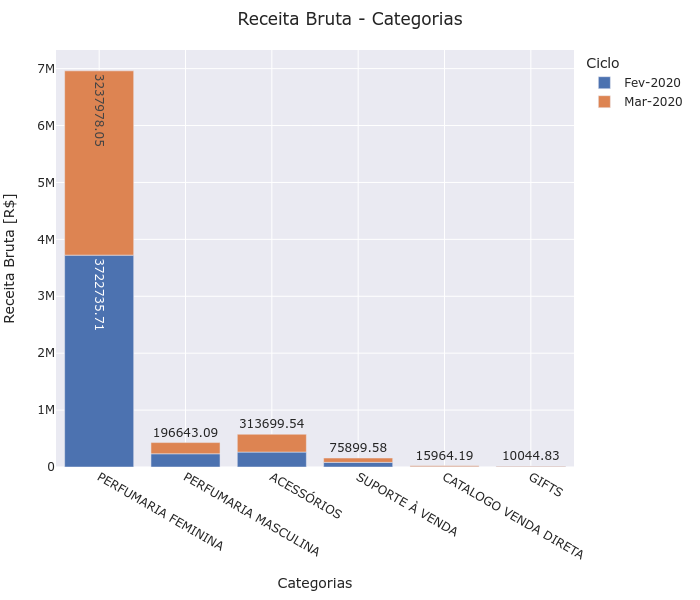

In [11]:
categoria = base.groupby(['Produto_Categoria', 'Ciclo']).\
    agg({'Receita_Bruta':'sum', 'Receita_Liquida':'sum', \
        'Desconto':'sum', 'Pedido_Valor_Volume':'sum'}).round(3).reset_index().\
    rename(columns={"Pedido_Valor_Volume": "Qtde_itens"}).sort_values(by='Qtde_itens', ascending=False)

fig = px.bar(categoria, x="Produto_Categoria", y="Receita_Bruta", \
    text="Receita_Bruta", color="Ciclo", hover_data=['Ciclo', 'Qtde_itens'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Receita Bruta - Categorias',
    xaxis_title="Categorias",
    yaxis_title="Receita Bruta [R$]",
    legend_title="Ciclo",
    width=700, 
    height=600,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

In [12]:
categoria.Receita_Bruta.sum()

8163363.860000001

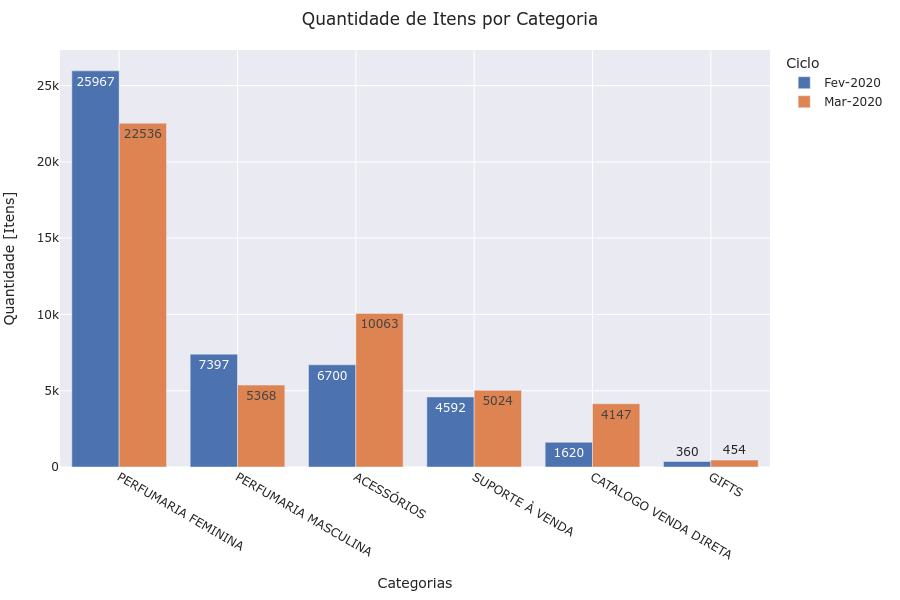

In [13]:
fig = px.bar(categoria, x="Produto_Categoria", y="Qtde_itens", \
    text="Qtde_itens", color="Ciclo", barmode='group', hover_data=['Ciclo', 'Qtde_itens'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Quantidade de Itens por Categoria',
    xaxis_title="Categorias",
    yaxis_title="Quantidade [Itens]",
    legend_title="Ciclo",
    width=900, 
    height=600,
    uniformtext_minsize=12, 
    uniformtext_mode='hide',
)
fig.show("png")

In [14]:
desc = base[base['Desconto'] != 0].groupby(['Produto_Categoria', 'Ciclo']).\
    agg({'Receita_Bruta':'sum', 'Receita_Liquida':'sum', \
        'Desconto':'sum', 'Pedido_Valor_Volume':'sum'}).round(3).reset_index().\
    rename(columns={"Pedido_Valor_Volume": "Qtde_itens"}).sort_values(by='Qtde_itens', ascending=False)

desc['Valor_med_p_item'] = desc.apply(lambda x: round(x['Receita_Bruta'] / x['Qtde_itens'],2), axis=1)
desc['Desc_p_item'] = desc.apply(lambda x: round(x['Desconto'] / x['Qtde_itens'],2), axis=1)
desc['Media_desc_p_item'] = desc.apply(lambda x: round(100 * (x['Desc_p_item'] / x['Valor_med_p_item']),2), axis=1)

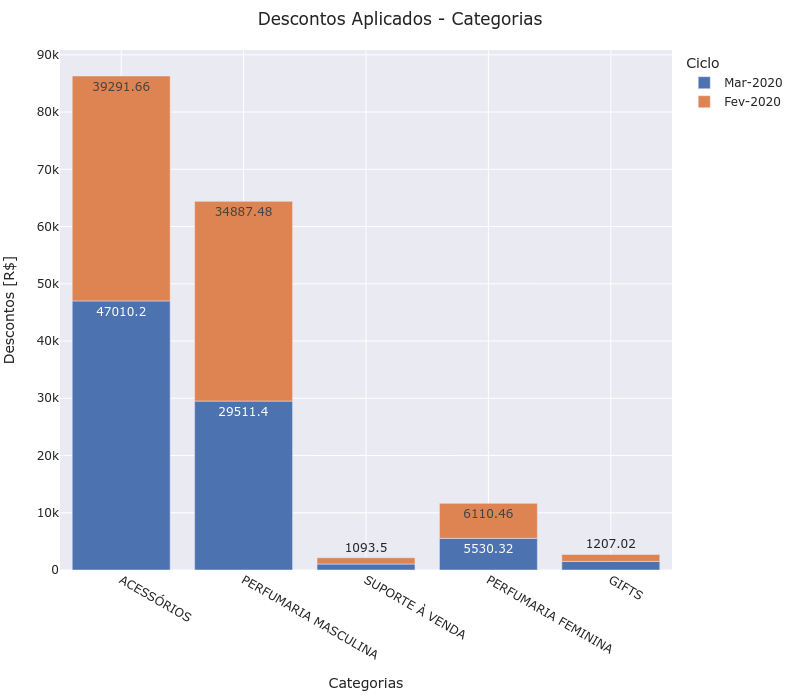

In [15]:
fig = px.bar(desc, x="Produto_Categoria", y="Desconto", \
    text="Desconto", color="Ciclo", hover_data=['Ciclo', 'Qtde_itens'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Descontos Aplicados - Categorias',
    xaxis_title="Categorias",
    yaxis_title="Descontos [R$]",
    legend_title="Ciclo",
    width=800, 
    height=700,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

In [16]:
desc

,Produto_Categoria,Ciclo,Receita_Bruta,Receita_Liquida,Desconto,Qtde_itens,Valor_med_p_item,Desc_p_item,Media_desc_p_item
1,ACESSÓRIOS,Mar-2020,313699.54,266689.34,47010.20,10063,31.17,4.67,14.98
6,PERFUMARIA MASCULINA,Fev-2020,232403.28,197515.80,34887.48,7397,31.42,4.72,15.02
0,ACESSÓRIOS,Fev-2020,262070.35,222778.69,39291.66,6700,39.11,5.86,14.98
7,PERFUMARIA MASCULINA,Mar-2020,196643.09,167131.69,29511.40,5368,36.63,5.50,15.02
8,SUPORTE À VENDA,Fev-2020,7290.00,6196.50,1093.50,3645,2.00,0.30,15.00
9,SUPORTE À VENDA,Mar-2020,6970.19,5924.66,1045.53,3456,2.02,0.30,14.85
4,PERFUMARIA FEMININA,Fev-2020,40795.17,34684.71,6110.46,1776,22.97,3.44,14.98
5,PERFUMARIA FEMININA,Mar-2020,36921.41,31391.09,5530.32,1601,23.06,3.45,14.96
3,GIFTS,Mar-2020,10044.83,8538.45,1506.38,454,22.13,3.32,15.00
2,GIFTS,Fev-2020,8055.95,6848.93,1207.02,360,22.38,3.35,14.97


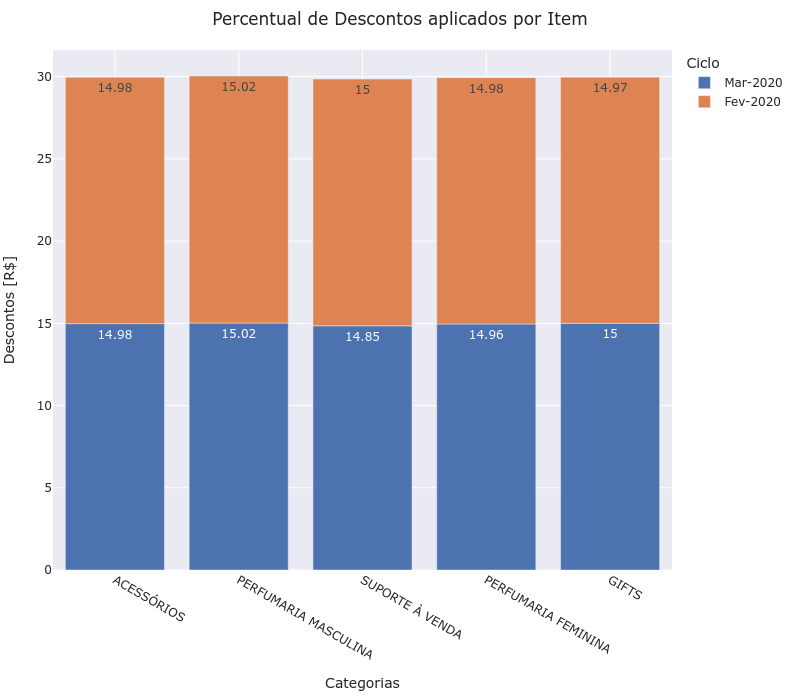

In [17]:
fig = px.bar(desc, x="Produto_Categoria", y="Media_desc_p_item", \
    text="Media_desc_p_item", color="Ciclo", hover_data=['Valor_med_p_item', 'Qtde_itens', 'Desc_p_item'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Percentual de Descontos aplicados por Item',
    xaxis_title="Categorias",
    yaxis_title="Descontos [R$]",
    legend_title="Ciclo",
    width=800, 
    height=700,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

# Produtos

In [18]:
base

,Ciclo_Ciclo,Revendedor,Franqueado,Loja,Produto_Categoria,Produto_Codigo,Produto_Descricao,Produto_Linha,Pedido_Valor_Volume,Receita_Bruta,Receita_Liquida,z_Numero_de_Pedidos,Desconto,Ciclo
0,2020.03,3454333,10276,19718,PERFUMARIA MASCULINA,42187,BOTI SHOWER GEL MALBEC 100ML,BOTI,9,359.10,305.28,1,53.82,Mar-2020
1,2020.03,7427988,10615,3791,ACESSÓRIOS,37233,ACESSORIO LATA MAES 2012,BOTI,1,24.99,21.24,1,3.75,Mar-2020
2,2020.03,5874455,10276,19718,PERFUMARIA MASCULINA,42187,BOTI SHOWER GEL MALBEC 100ML,BOTI,9,359.10,305.28,1,53.82,Mar-2020
3,2020.02,1287249,10260,13838,PERFUMARIA MASCULINA,44865,BOTI DEOS AEROSOL MALBEC 40ML,BOTI,9,224.10,190.44,1,33.66,Fev-2020
4,2020.02,1365227,10040,14241,PERFUMARIA MASCULINA,44865,BOTI DEOS AEROSOL MALBEC 40ML,BOTI,9,224.10,190.44,1,33.66,Fev-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80083,2020.03,7147375,10361,13460,SUPORTE À VENDA,44692,BOTI FITA OLFATIVA VD,BOTI,1,1.38,1.38,1,0.00,Mar-2020
80084,2020.02,1712873,10442,13654,SUPORTE À VENDA,46573,BOTI CARTUCHO COMB NAT/20 VDA,BOTI,9,0.27,0.27,1,0.00,Fev-2020
80085,2020.03,1886905,10345,14398,SUPORTE À VENDA,46573,BOTI CARTUCHO COMB NAT/20 VDA,BOTI,5,0.15,0.15,1,0.00,Mar-2020
80086,2020.02,527762,10560,18240,SUPORTE À VENDA,46573,BOTI CARTUCHO COMB NAT/20 VDA,BOTI,4,0.12,0.12,1,0.00,Fev-2020


In [19]:
produtos = base.groupby(['Produto_Descricao', 'Ciclo']).\
    agg({'Receita_Bruta':'sum', 'Receita_Liquida':'sum', \
        'Desconto':'sum', 'Pedido_Valor_Volume':'sum'}).round(3).\
    rename(columns={"Pedido_Valor_Volume": "Qtde_itens"}).sort_values(by='Qtde_itens', ascending=False).reset_index()

produtos['ReceitaL_p_Item'] = round(produtos['Receita_Liquida'] / produtos['Qtde_itens'],2)

produtos['% Qtde_Itens'] = produtos.apply(lambda x: round(100*(x['Qtde_itens'] / ((produtos[produtos['Produto_Descricao']==x['Produto_Descricao']]['Qtde_itens'].sum()) \
    - x['Qtde_itens']) - 1), 2), axis=1)

produtos['% Liq_med_p_Item'] = produtos.apply(lambda x: round(100*(x['ReceitaL_p_Item'] / ((produtos[produtos['Produto_Descricao']==x['Produto_Descricao']]['ReceitaL_p_Item'].sum()) \
    - x['ReceitaL_p_Item']) - 1), 2), axis=1)

In [20]:
produtos[produtos['Ciclo'] == 'Fev-2020'].head(10)

,Produto_Descricao,Ciclo,Receita_Bruta,Receita_Liquida,Desconto,Qtde_itens,ReceitaL_p_Item,% Qtde_Itens,% Liq_med_p_Item
0,BOT PERFUME LILLY 75ML - ED ESPECIAL,Fev-2020,3681940.54,3681940.54,0.00,24191,152.20,15.55,-0.46
2,BOTI DEOS AEROSOL MALBEC 40ML,Fev-2020,159009.90,135127.16,23882.74,6401,21.11,53.57,-0.19
5,BOT BLOCO DE PEDIDOS VD,Fev-2020,7290.00,6196.50,1093.50,3645,1.70,5.53,0.00
9,BOT SABONETE LÍQ LILLY 50ML,Fev-2020,32830.20,27913.96,4916.24,1658,16.84,11.35,-0.47
11,CATALOGO CICLO PROXIMO SELL OUT,Fev-2020,5082.00,5082.00,0.00,1320,3.85,-64.35,0.00
15,BOTI SPLASH MALBEC 100ML,Fev-2020,69552.80,59124.24,10428.56,872,67.80,-22.90,-0.13
17,BOTI MASCARA PROT MALHA PRETA M,Fev-2020,9386.70,7981.32,1405.38,525,15.20,-73.46,-0.13
18,BOTI NECESS VIAGEM PES C/A,Fev-2020,35472.90,30154.30,5318.60,521,57.88,11.09,-2.59
19,BOTI NECESS MASC MALBEC CLUB PVC C/ALC,Fev-2020,30992.20,26345.96,4646.24,518,50.86,9.05,-0.10
20,BOTI MASCARA PROT MALHA CINZA MESCLA M,Fev-2020,8505.90,7232.40,1273.50,477,15.16,-35.71,-0.39


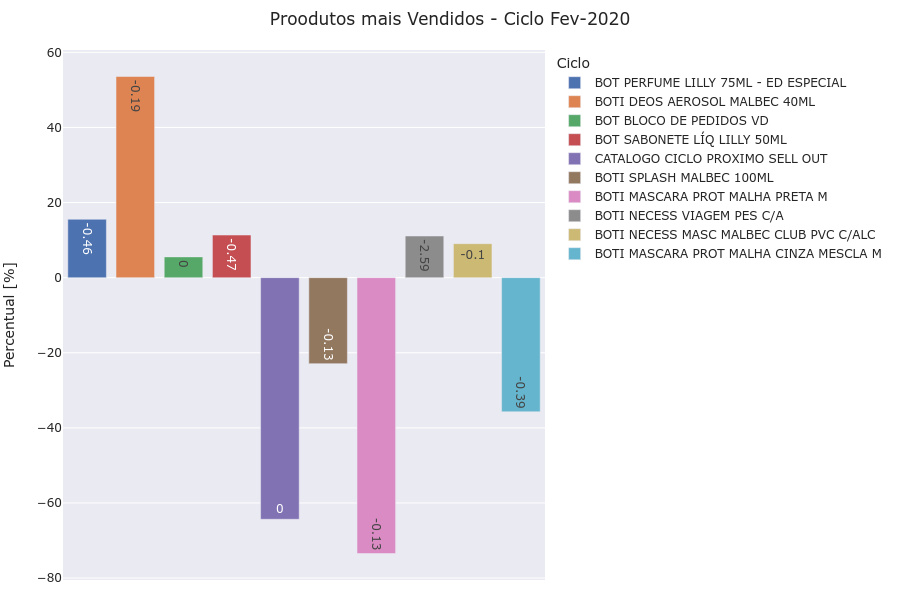

In [21]:
fig = px.bar(produtos[produtos['Ciclo'] == 'Fev-2020'].head(10), x="Produto_Descricao", y="% Qtde_Itens", \
    text="% Liq_med_p_Item", color="Produto_Descricao", hover_data=['Produto_Descricao', 'ReceitaL_p_Item', '% Qtde_Itens', '% Liq_med_p_Item'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Proodutos mais Vendidos - Ciclo Fev-2020',
    xaxis_title="Categorias",
    yaxis_title="Percentual [%]",
    legend_title="Ciclo",
    width=900, 
    height=600,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.update_xaxes(visible=False)
fig.show("png")

In [22]:
produtos[produtos['Ciclo'] == 'Mar-2020'].head(10)

,Produto_Descricao,Ciclo,Receita_Bruta,Receita_Liquida,Desconto,Qtde_itens,ReceitaL_p_Item,% Qtde_Itens,% Liq_med_p_Item
1,BOT PERFUME LILLY 75ML - ED ESPECIAL,Mar-2020,3201056.64,3201056.64,0.00,20935,152.90,-13.46,0.46
3,BOTI DEOS AEROSOL MALBEC 40ML,Mar-2020,103746.03,88163.41,15582.62,4168,21.15,-34.89,0.19
4,CATALOGO CICLO PROXIMO SELL OUT,Mar-2020,14254.79,14254.79,0.00,3703,3.85,180.53,0.00
6,BOT BLOCO DE PEDIDOS VD,Mar-2020,6906.21,5870.28,1035.93,3454,1.70,-5.24,0.00
7,BOTI MASCARA PROT MALHA PRETA M,Mar-2020,35404.33,30103.56,5300.77,1978,15.22,276.76,0.13
8,BOTI NECESS ENVELOPE PU ROSA C/A,Mar-2020,33617.92,28583.62,5034.30,1690,16.91,293.02,-20.09
10,BOT SABONETE LÍQ LILLY 50ML,Mar-2020,29625.97,25189.49,4436.48,1489,16.92,-10.19,0.48
12,BOTI NECESS ENVELOPE DOURADO PU C/A,Mar-2020,24924.05,21191.60,3732.45,1252,16.93,284.05,-19.15
13,BOTI SPLASH MALBEC 100ML,Mar-2020,90326.08,76782.78,13543.30,1131,67.89,29.70,0.13
14,BOTI FITA OLFATIVA VD,Mar-2020,1556.26,1556.26,0.00,1038,1.50,371.82,0.00


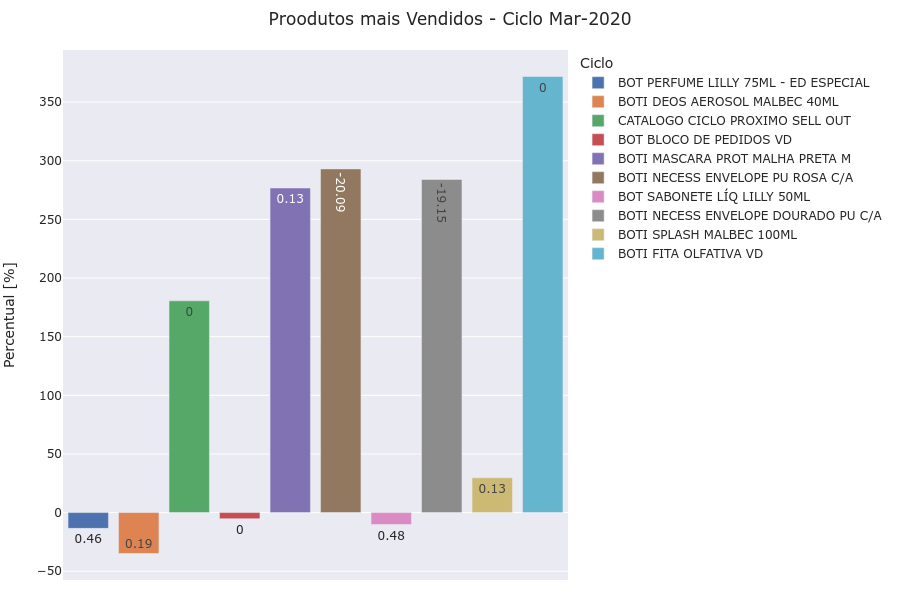

In [23]:
fig = px.bar(produtos[produtos['Ciclo'] == 'Mar-2020'].head(10), x="Produto_Descricao", y="% Qtde_Itens", \
    text="% Liq_med_p_Item", color="Produto_Descricao", hover_data=['Produto_Descricao', 'ReceitaL_p_Item', '% Qtde_Itens', '% Liq_med_p_Item'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Proodutos mais Vendidos - Ciclo Mar-2020',
    xaxis_title="Categorias",
    yaxis_title="Percentual [%]",
    legend_title="Ciclo",
    width=900, 
    height=600,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.update_xaxes(visible=False)
fig.show("png")

In [24]:
base.columns

Index(['Ciclo_Ciclo', 'Revendedor', 'Franqueado', 'Loja', 'Produto_Categoria',
       'Produto_Codigo', 'Produto_Descricao', 'Produto_Linha',
       'Pedido_Valor_Volume', 'Receita_Bruta', 'Receita_Liquida',
       'z_Numero_de_Pedidos', 'Desconto', 'Ciclo'],
      dtype='object')

In [25]:
revendedores = base.groupby(['Revendedor', 'Ciclo', 'Franqueado', 'Loja']).\
    agg({'Receita_Bruta':'sum', 'Receita_Liquida':'sum', \
        'Desconto':'sum', 'Pedido_Valor_Volume':'sum', 'z_Numero_de_Pedidos':'nunique'}).round(3).reset_index().\
    rename(columns={"Pedido_Valor_Volume": "Qtde_itens", 'z_Numero_de_Pedidos': 'Numero_de_Pedidos'}).sort_values(by='Receita_Bruta', ascending=False)

In [26]:
#Numero total de pedidos
totais_ciclo = revendedores.groupby(['Ciclo']).agg({'Revendedor':'nunique','Loja':'nunique' ,'Numero_de_Pedidos':'sum', 'Qtde_itens':'sum',\
    'Numero_de_Pedidos':'sum', 'Receita_Bruta':'sum', 'Receita_Liquida':'sum'}).rename(columns={'Revendedor':'Qtde_Revend', 'Loja':'Qtde_Lojas'})

totais_ciclo['Descontos'] = totais_ciclo['Receita_Bruta'] - totais_ciclo['Receita_Liquida']

totais_ciclo['% Qtde_Revend'] = totais_ciclo.apply(lambda x: round(100*(x['Qtde_Revend'] / ((totais_ciclo['Qtde_Revend'].sum()) \
    - x['Qtde_Revend']) - 1), 2), axis=1)


totais_ciclo['% Qtde_Lojas'] = totais_ciclo.apply(lambda x: round(100*(x['Qtde_Lojas'] / ((totais_ciclo['Qtde_Lojas'].sum()) \
    - x['Qtde_Lojas']) - 1), 2), axis=1)


totais_ciclo['% Numero_de_Pedidos'] = totais_ciclo.apply(lambda x: round(100*(x['Numero_de_Pedidos'] / ((totais_ciclo['Numero_de_Pedidos'].sum()) \
    - x['Numero_de_Pedidos']) - 1), 2), axis=1)


totais_ciclo['% itens'] = totais_ciclo.apply(lambda x: round(100*(x['Qtde_itens'] / ((totais_ciclo['Qtde_itens'].sum()) \
    - x['Qtde_itens']) - 1), 2), axis=1)


totais_ciclo['% Receita_Bruta'] = totais_ciclo.apply(lambda x: round(100*(x['Receita_Bruta'] / ((totais_ciclo['Receita_Bruta'].sum()) \
    - x['Receita_Bruta']) - 1), 2), axis=1)


totais_ciclo['% Receita_Liquida'] = totais_ciclo.apply(lambda x: round(100*(x['Receita_Liquida'] / ((totais_ciclo['Receita_Liquida'].sum()) \
    - x['Receita_Liquida']) - 1), 2), axis=1)


totais_ciclo['% Descontos'] = totais_ciclo.apply(lambda x: round(100*(x['Descontos'] / ((totais_ciclo['Descontos'].sum()) \
    - x['Descontos']) - 1), 2), axis=1)


totais_ciclo

,Qtde_Revend,Qtde_Lojas,Numero_de_Pedidos,Qtde_itens,Receita_Bruta,Receita_Liquida,Descontos,% Qtde_Revend,% Qtde_Lojas,% Numero_de_Pedidos,% itens,% Receita_Bruta,% Receita_Liquida,% Descontos
Ciclo,,,,,,,,,,,,,,
Fev-2020,38374,874,38436,46636,4313134.58,4230544.46,82590.12,1.84,-0.46,1.74,-2.01,12.02,12.35,-2.38
Mar-2020,37682,878,37777,47592,3850229.28,3765625.45,84603.83,-1.80,0.46,-1.71,2.05,-10.73,-10.99,2.44


# Desempenho dos revendedores baseado na receita liquida

In [27]:
#Fevereiro
revendedores[revendedores['Ciclo'] == 'Fev-2020'].sort_values(by='Receita_Liquida', ascending=False).head(10)

,Revendedor,Ciclo,Franqueado,Loja,Receita_Bruta,Receita_Liquida,Desconto,Qtde_itens,Numero_de_Pedidos
19300,4080295,Fev-2020,10005,13909,1592.00,1592.00,0.00,8,1
8494,1243237,Fev-2020,10039,13347,1280.30,1088.36,191.94,27,2
34630,6999063,Fev-2020,10383,19975,1255.60,1067.10,188.50,44,2
25063,5596406,Fev-2020,10126,17292,796.00,796.00,0.00,4,1
31866,6692822,Fev-2020,10164,13480,796.00,796.00,0.00,4,1
8363,1220280,Fev-2020,10439,13437,897.00,762.60,134.40,30,1
20067,4252834,Fev-2020,13031,13125,756.40,756.40,0.00,9,2
13464,2538843,Fev-2020,13031,13125,614.40,614.40,0.00,12,1
22014,4667496,Fev-2020,10351,11105,597.00,597.00,0.00,3,1
1192,111563,Fev-2020,10522,14750,597.00,597.00,0.00,3,1


In [28]:
#Março
revendedores[revendedores['Ciclo'] == 'Mar-2020'].sort_values(by='Receita_Liquida', ascending=False).head(10)

,Revendedor,Ciclo,Franqueado,Loja,Receita_Bruta,Receita_Liquida,Desconto,Qtde_itens,Numero_de_Pedidos
9363,1406340,Mar-2020,10825,13658,796.00,796.00,0.00,4,1
30496,6543490,Mar-2020,13031,20890,796.00,796.00,0.00,4,1
30840,6580794,Mar-2020,11143,11671,796.00,796.00,0.00,4,1
68863,7771196,Mar-2020,13031,20890,746.00,746.00,0.00,4,1
17533,3655056,Mar-2020,10074,14363,846.60,719.44,127.16,34,1
19527,4132723,Mar-2020,10133,18228,788.50,670.30,118.20,15,1
2880,310534,Mar-2020,10282,20090,747.00,634.80,112.20,30,1
13730,2612533,Mar-2020,10857,20122,597.00,597.00,0.00,3,1
12637,2234282,Mar-2020,10066,14044,597.00,597.00,0.00,3,2
34129,6941062,Mar-2020,10009,3879,597.00,597.00,0.00,3,1


# Desempenho dos franqueados

In [29]:
franqueado = revendedores.groupby(['Franqueado', 'Ciclo']).agg({'Receita_Bruta':'sum', \
    'Receita_Liquida':'sum', 'Desconto':'sum', 'Loja':'nunique', 'Revendedor':'nunique', 'Qtde_itens':'sum', 'Numero_de_Pedidos':'sum'}).\
        round(3).reset_index().rename(columns={"Loja": "Qtde_Lojas", "Revendedor": "Qtde_Rev", "Numero_de_Pedidos":"N_pedidos"}).sort_values(by='Receita_Bruta', ascending=False)

franqueado['Liq_Med_p_Item'] = franqueado.apply(lambda x: round((x['Receita_Liquida'] / x['Qtde_itens']),2), axis=1)
franqueado['Desc_Med_p_Item'] = franqueado.apply(lambda x: round((x['Desconto'] / x['Qtde_itens']),2), axis=1)
franqueado['Desc_Med_p_Loja'] = franqueado.apply(lambda x: round((x['Desconto'] / x['Qtde_Lojas']),2), axis=1)
franqueado['Receita_Liq_p_Loja'] = franqueado.apply(lambda x: round((x['Receita_Liquida'] / x['Qtde_Lojas']),2), axis=1)
franqueado['Receita_Liq_p_Rev'] = franqueado.apply(lambda x: round((x['Receita_Liquida'] / x['Qtde_Rev']),2), axis=1)

franqueado['Qtde_Rev_p_Loja'] = franqueado.apply(lambda x: round((x['Qtde_Rev'] / x['Qtde_Lojas']),2), axis=1)

In [30]:
#Maiores receitas liquidas - Franqueados
franqueado.head(10)

,Franqueado,Ciclo,Receita_Bruta,Receita_Liquida,Desconto,Qtde_Lojas,Qtde_Rev,Qtde_itens,N_pedidos,Liq_Med_p_Item,Desc_Med_p_Item,Desc_Med_p_Loja,Receita_Liq_p_Loja,Receita_Liq_p_Rev,Qtde_Rev_p_Loja
981,13031,Fev-2020,636000.95,619289.66,16711.29,25,6266,8073,6284,76.71,2.07,668.45,24771.59,98.83,250.64
982,13031,Mar-2020,596118.34,580552.00,15566.34,25,6506,8433,6534,68.84,1.85,622.65,23222.08,89.23,260.24
323,10269,Fev-2020,117757.25,116600.11,1157.14,17,872,958,872,121.71,1.21,68.07,6858.83,133.72,51.29
391,10351,Fev-2020,94463.02,93382.36,1080.66,2,761,859,761,108.71,1.26,540.33,46691.18,122.71,380.50
392,10351,Mar-2020,67896.12,66622.18,1273.94,2,622,726,623,91.77,1.75,636.97,33311.09,107.11,311.00
324,10269,Mar-2020,66188.63,64961.33,1227.30,17,584,657,585,98.88,1.87,72.19,3821.25,111.24,34.35
991,19825,Fev-2020,61445.30,60599.26,846.04,2,511,578,511,104.84,1.46,423.02,30299.63,118.59,255.50
992,19825,Mar-2020,55112.25,54236.61,875.64,2,484,615,485,88.19,1.42,437.82,27118.31,112.06,242.00
965,11334,Fev-2020,52635.48,52475.60,159.88,9,355,359,355,146.17,0.45,17.76,5830.62,147.82,39.44
213,10169,Mar-2020,48156.42,47330.29,826.13,2,420,571,422,82.89,1.45,413.06,23665.15,112.69,210.00


In [31]:
#Maiores Receitas liquidas por Loja
franqueado.sort_values(by='Receita_Liq_p_Rev', ascending=False).head(10)

,Franqueado,Ciclo,Receita_Bruta,Receita_Liquida,Desconto,Qtde_Lojas,Qtde_Rev,Qtde_itens,N_pedidos,Liq_Med_p_Item,Desc_Med_p_Item,Desc_Med_p_Loja,Receita_Liq_p_Loja,Receita_Liq_p_Rev,Qtde_Rev_p_Loja
242,10195,Fev-2020,845.00,845.00,0.00,1,4,5,4,169.00,0.00,0.00,845.00,211.25,4.00
338,10280,Mar-2020,6394.90,6383.82,11.08,1,31,37,31,172.54,0.30,11.08,6383.82,205.93,31.00
787,10695,Mar-2020,547.00,547.00,0.00,1,3,3,3,182.33,0.00,0.00,547.00,182.33,3.00
421,10373,Fev-2020,547.00,547.00,0.00,1,3,3,3,182.33,0.00,0.00,547.00,182.33,3.00
930,10825,Mar-2020,1964.05,1946.09,17.96,1,11,16,11,121.63,1.12,17.96,1946.09,176.92,11.00
768,10682,Mar-2020,348.00,348.00,0.00,1,2,2,2,174.00,0.00,0.00,348.00,174.00,2.00
52,10039,Fev-2020,2823.70,2608.88,214.82,1,15,42,16,62.12,5.11,214.82,2608.88,173.93,15.00
305,10253,Mar-2020,19708.30,19631.38,76.92,1,114,123,114,159.60,0.63,76.92,19631.38,172.21,114.00
342,10283,Mar-2020,13542.10,13471.86,70.24,1,79,89,79,151.37,0.79,70.24,13471.86,170.53,79.00
243,10195,Mar-2020,845.00,845.00,0.00,1,5,5,5,169.00,0.00,0.00,845.00,169.00,5.00


## Calculando o preço médio por  produto agrupado por ciclo

In [32]:
prec_med_fev = revendedores[revendedores['Ciclo']=='Fev-2020']['Receita_Bruta'].sum() /\
     revendedores[revendedores['Ciclo']=='Fev-2020']['Qtde_itens'].sum()
prec_med_fev

92.48508834376877

In [33]:
prec_med_mar = revendedores[revendedores['Ciclo']=='Mar-2020']['Receita_Bruta'].sum() /\
     revendedores[revendedores['Ciclo']=='Mar-2020']['Qtde_itens'].sum()
prec_med_mar

80.90076651538074

## Desembolso medio por Revendedor

In [34]:
des_med_por_rev_fev = revendedores[revendedores['Ciclo']=='Fev-2020']['Receita_Bruta'].sum() /\
     len(revendedores[revendedores['Ciclo']=='Fev-2020']['Revendedor'].unique())
des_med_por_rev_fev

112.39731536978162

In [35]:
des_med_por_rev_mar = revendedores[revendedores['Ciclo']=='Mar-2020']['Receita_Bruta'].sum() /\
     len(revendedores[revendedores['Ciclo']=='Mar-2020']['Revendedor'].unique())
des_med_por_rev_mar

102.17688233108646

## Média de itens por boleto

In [36]:
itens_por_boleto_fev = revendedores[revendedores['Ciclo'] == 'Fev-2020']['Qtde_itens'].sum() /\
     revendedores[revendedores['Ciclo'] == 'Fev-2020']['Numero_de_Pedidos'].sum()
itens_por_boleto_fev

1.213341658861484

In [37]:
itens_por_boleto_mar = revendedores[revendedores['Ciclo'] == 'Mar-2020']['Qtde_itens'].sum() /\
     revendedores[revendedores['Ciclo'] == 'Mar-2020']['Numero_de_Pedidos'].sum()
itens_por_boleto_mar

1.259814172644731

# Basket analisys - Algoritimo Apriori

## ------ Fevereiro - 2020 ----------

In [38]:
#criando um id para separar os boletos
base['id_basket'] = base.apply(lambda x: str(x['Revendedor']) + '-' + str(x['z_Numero_de_Pedidos']), axis=1)

basket_plus = base[base['Ciclo'] == 'Fev-2020'].groupby(['id_basket','Produto_Descricao'])['Pedido_Valor_Volume'].\
    sum().unstack().reset_index().fillna(0).set_index('id_basket')

#encode
basket_plus = basket_plus.applymap(lambda x: 0 if x<=0 else 1)

print(f"Quantidade de pedidos: {len(basket_plus)}")

#filtrando os que tem mais de um item
basket_plus = basket_plus[(basket_plus > 0).sum(axis=1) >= 2]

print(f"Quantidade de itens de pedidos com mais de um item: {len(basket_plus)}")


Quantidade de pedidos: 38436
Quantidade de itens de pedidos com mais de um item: 1424


In [39]:
#Aplicando o algoritmo Apriori
frequent_itens = apriori(basket_plus, min_support=0.03, use_colnames=True).\
    sort_values('support', ascending=False).reset_index(drop=True)

In [40]:
frequent_itens['length'] = frequent_itens['itemsets'].apply(lambda x: len(x))
frequent_itens

,support,itemsets,length
0,0.32,(BOT PERFUME LILLY 75ML - ED ESPECIAL),1
1,0.23,(BOTI DEOS AEROSOL MALBEC 40ML),1
2,0.16,(BOT BLOCO DE PEDIDOS VD),1
3,0.11,(BOT SABONETE LÍQ LILLY 50ML),1
4,0.09,(BOTI MASCARA PROT MALHA CINZA MESCLA M),1
5,0.09,(CATALOGO CICLO PROXIMO SELL OUT),1
6,0.08,(BOTI MASCARA PROT MALHA PRETA M),1
7,0.08,(BOTI SPLASH MALBEC 100ML),1
8,0.07,(BOTI NECESS ENVELOPE PU ROSA C/A),1
9,0.07,(BOTI MASCARA PROT MALHA PRETA G),1


In [41]:
#criando as regras de associação
association_rules(frequent_itens, metric='lift', min_threshold=0.8).sort_values(by='lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BOTI NECESS ENVELOPE DOURADO PU C/A),(BOTI NECESS ENVELOPE PU ROSA C/A),0.06,0.07,0.03,0.54,7.21,0.03,2.00
1,(BOTI NECESS ENVELOPE PU ROSA C/A),(BOTI NECESS ENVELOPE DOURADO PU C/A),0.07,0.06,0.03,0.42,7.21,0.03,1.61
2,(BOTI MASCARA PROT MALHA CINZA MESCLA M),(BOTI MASCARA PROT MALHA PRETA M),0.09,0.08,0.05,0.59,7.11,0.05,2.26
3,(BOTI MASCARA PROT MALHA PRETA M),(BOTI MASCARA PROT MALHA CINZA MESCLA M),0.08,0.09,0.05,0.64,7.11,0.05,2.52
4,(BOTI MASCARA PROT MALHA CINZA MESCLA M),(BOTI MASCARA PROT MALHA PRETA G),0.09,0.07,0.04,0.39,5.40,0.03,1.52
5,(BOTI MASCARA PROT MALHA PRETA G),(BOTI MASCARA PROT MALHA CINZA MESCLA M),0.07,0.09,0.04,0.49,5.40,0.03,1.77
6,(CATALOGO CICLO PROXIMO SELL OUT),(BOT BLOCO DE PEDIDOS VD),0.09,0.16,0.04,0.39,2.42,0.02,1.38
7,(BOT BLOCO DE PEDIDOS VD),(CATALOGO CICLO PROXIMO SELL OUT),0.16,0.09,0.04,0.22,2.42,0.02,1.16
8,(BOT PERFUME LILLY 75ML - ED ESPECIAL),(BOT BLOCO DE PEDIDOS VD),0.32,0.16,0.05,0.15,0.89,-0.01,0.98
9,(BOT BLOCO DE PEDIDOS VD),(BOT PERFUME LILLY 75ML - ED ESPECIAL),0.16,0.32,0.05,0.28,0.89,-0.01,0.95


## ------ Março - 2020 ----------

In [42]:
basket_plus_mar = base[base['Ciclo'] == 'Mar-2020'].groupby(['id_basket','Produto_Descricao'])['Pedido_Valor_Volume'].\
    sum().unstack().reset_index().fillna(0).set_index('id_basket')

#encode
basket_plus_mar = basket_plus_mar.applymap(lambda x: 0 if x<=0 else 1)

print(f"Quantidade de pedidos: {len(basket_plus_mar)}")

#filtrando os que tem mais de um item
basket_plus_mar = basket_plus_mar[(basket_plus_mar > 0).sum(axis=1) >= 2]

print(f"Quantidade de itens de pedidos com mais de um item: {len(basket_plus_mar)}")

Quantidade de pedidos: 37777
Quantidade de itens de pedidos com mais de um item: 2046


In [43]:
#Aplicando o algoritmo Apriori
frequent_itens_mar = apriori(basket_plus_mar, min_support=0.03, use_colnames=True).\
    sort_values('support', ascending=False).reset_index(drop=True)

In [44]:
frequent_itens_mar['length'] = frequent_itens_mar['itemsets'].apply(lambda x: len(x))
frequent_itens_mar

,support,itemsets,length
0,0.25,(BOT PERFUME LILLY 75ML - ED ESPECIAL),1
1,0.19,(CATALOGO CICLO PROXIMO SELL OUT),1
2,0.18,(BOTI NECESS ENVELOPE PU ROSA C/A),1
3,0.17,(BOT BLOCO DE PEDIDOS VD),1
4,0.16,(BOTI NECESS ENVELOPE DOURADO PU C/A),1
5,0.15,(BOTI MASCARA PROT MALHA PRETA M),1
6,0.14,(BOTI DEOS AEROSOL MALBEC 40ML),1
7,0.11,(BOTI MASCARA PROT MALHA CINZA MESCLA M),1
8,0.11,"(BOTI NECESS ENVELOPE DOURADO PU C/A, BOTI NEC...",2
9,0.09,(BOTI FITA OLFATIVA VD),1


In [45]:
#criando as regras de associação
association_rules(frequent_itens_mar, metric='lift', min_threshold=0.5).sort_values(by='lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BOTI MASCARA PROT MALHA PRETA M),(BOTI MASCARA PROT MALHA CINZA MESCLA M),0.15,0.11,0.08,0.54,4.80,0.06,1.91
1,(BOTI MASCARA PROT MALHA CINZA MESCLA M),(BOTI MASCARA PROT MALHA PRETA M),0.11,0.15,0.08,0.73,4.80,0.06,3.17
2,(CATALOGO CICLO PROXIMO SELL OUT),(CATALOGO CICLO ATUAL SELL OUT),0.19,0.08,0.07,0.35,4.31,0.05,1.42
3,(CATALOGO CICLO ATUAL SELL OUT),(CATALOGO CICLO PROXIMO SELL OUT),0.08,0.19,0.07,0.84,4.31,0.05,4.98
4,(BOTI NECESS ENVELOPE PU ROSA C/A),(BOTI NECESS ENVELOPE DOURADO PU C/A),0.18,0.16,0.11,0.60,3.84,0.08,2.09
5,(BOTI NECESS ENVELOPE DOURADO PU C/A),(BOTI NECESS ENVELOPE PU ROSA C/A),0.16,0.18,0.11,0.69,3.84,0.08,2.66
6,(BOTI FITA OLFATIVA VD),(BOT BLOCO DE PEDIDOS VD),0.09,0.17,0.04,0.49,2.99,0.03,1.65
7,(BOT BLOCO DE PEDIDOS VD),(BOTI FITA OLFATIVA VD),0.17,0.09,0.04,0.26,2.99,0.03,1.23
8,(CATALOGO CICLO PROXIMO SELL OUT),(BOT BLOCO DE PEDIDOS VD),0.19,0.17,0.06,0.28,1.72,0.02,1.17
9,(BOT BLOCO DE PEDIDOS VD),(CATALOGO CICLO PROXIMO SELL OUT),0.17,0.19,0.06,0.33,1.72,0.02,1.21
